In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
from mpl_toolkits.basemap import Basemap

import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag


%matplotlib inline
%config InlineBackend.figure_formats = {'retina',}

In [17]:
gauss_coef = pd.read_csv('gauss_coefs2.dat', skiprows=2, delim_whitespace=True, dtype=float)

In [18]:
# gauss_coef = gauss_coef.ix[gauss_coef['t_step']<=3000000.].ix[gauss_coef['t_step']>=2900000.]
gauss_coef = gauss_coef.ix[gauss_coef['t_step']>=2800000.]
gauss_coef.reset_index(inplace=True, drop=True)

In [19]:
gauss_coef.tail()

,t_step,time,h1_1,g1_0,g1_1,h2_2,h2_1,g2_0,g2_1,g2_2,h3_3,h3_2,h3_1,g3_0,g3_1,g3_2,g3_3
1996,2999600.0,1.49980,0.005797,0.062651,-0.001261,-0.000321,0.001700,0.001358,-0.001316,0.000351,-0.000090,0.000543,-0.00074,0.001788,0.000330,0.000415,0.000095
1997,2999700.0,1.49985,0.005812,0.062656,-0.001248,-0.000317,0.001699,0.001364,-0.001320,0.000350,-0.000097,0.000545,-0.00074,0.001783,0.000323,0.000416,0.000095
1998,2999800.0,1.49990,0.005826,0.062660,-0.001234,-0.000313,0.001698,0.001369,-0.001324,0.000349,-0.000104,0.000547,-0.00074,0.001778,0.000315,0.000417,0.000094
1999,2999900.0,1.49995,0.005840,0.062665,-0.001220,-0.000309,0.001698,0.001373,-0.001328,0.000349,-0.000111,0.000550,-0.00074,0.001774,0.000308,0.000418,0.000094
2000,3000000.0,1.50000,0.005852,0.062670,-0.001206,-0.000306,0.001697,0.001376,-0.001332,0.000349,-0.000118,0.000552,-0.00074,0.001771,0.000301,0.000419,0.000094


In [20]:
# phi = np.linspace(0, np.pi, 100)
# theta = np.linspace(0, 2*np.pi, 100)
# phi, theta = np.meshgrid(phi, theta)

# # The Cartesian coordinates of the unit sphere
# x = np.sin(phi) * np.cos(theta)
# y = np.sin(phi) * np.sin(theta)
# z = np.cos(phi)

# try:
#     del fcolors
# except:
#     pass

# for (l, m) in [(1, 1), (2, 2), (2, 1), (2, 0), (3, 3), (3, 2), (3, 1), (3, 0)]:#, (1, 0)
#     g_coef = gauss_coef['g{0}_{1}'.format(l, m)].tolist()
#     try:
#         h_coef = gauss_coef['h{0}_{1}'.format(l, m)].tolist()
#     except:
#         h_coef = [0]*len(g_coef)
#     try:
#         fcolors += (g_coef[0]*np.cos(m*phi)+h_coef[0]*np.sin(m*phi))*sph_harm(m, l, theta, phi).real
#     except:
#         fcolors = (g_coef[0]*np.cos(m*phi)+h_coef[0]*np.sin(m*phi))*sph_harm(m, l, theta, phi).real
# fmax, fmin = fcolors.max(), fcolors.min()
# fcolors = (fcolors - fmin)/(fmax - fmin)

# # Set the aspect ratio to 1 so our sphere looks spherical
# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
# # Turn off the axis planes
# ax.set_axis_off()
# # plt.title('m={0}, n={1}'.format(m,l), fontsize='x-large', position=(0.5,0.86))
# plt.tight_layout()
# # plt.savefig('sph_harm_m{0}_n{1}.pdf'.format(m,l))
# plt.show()

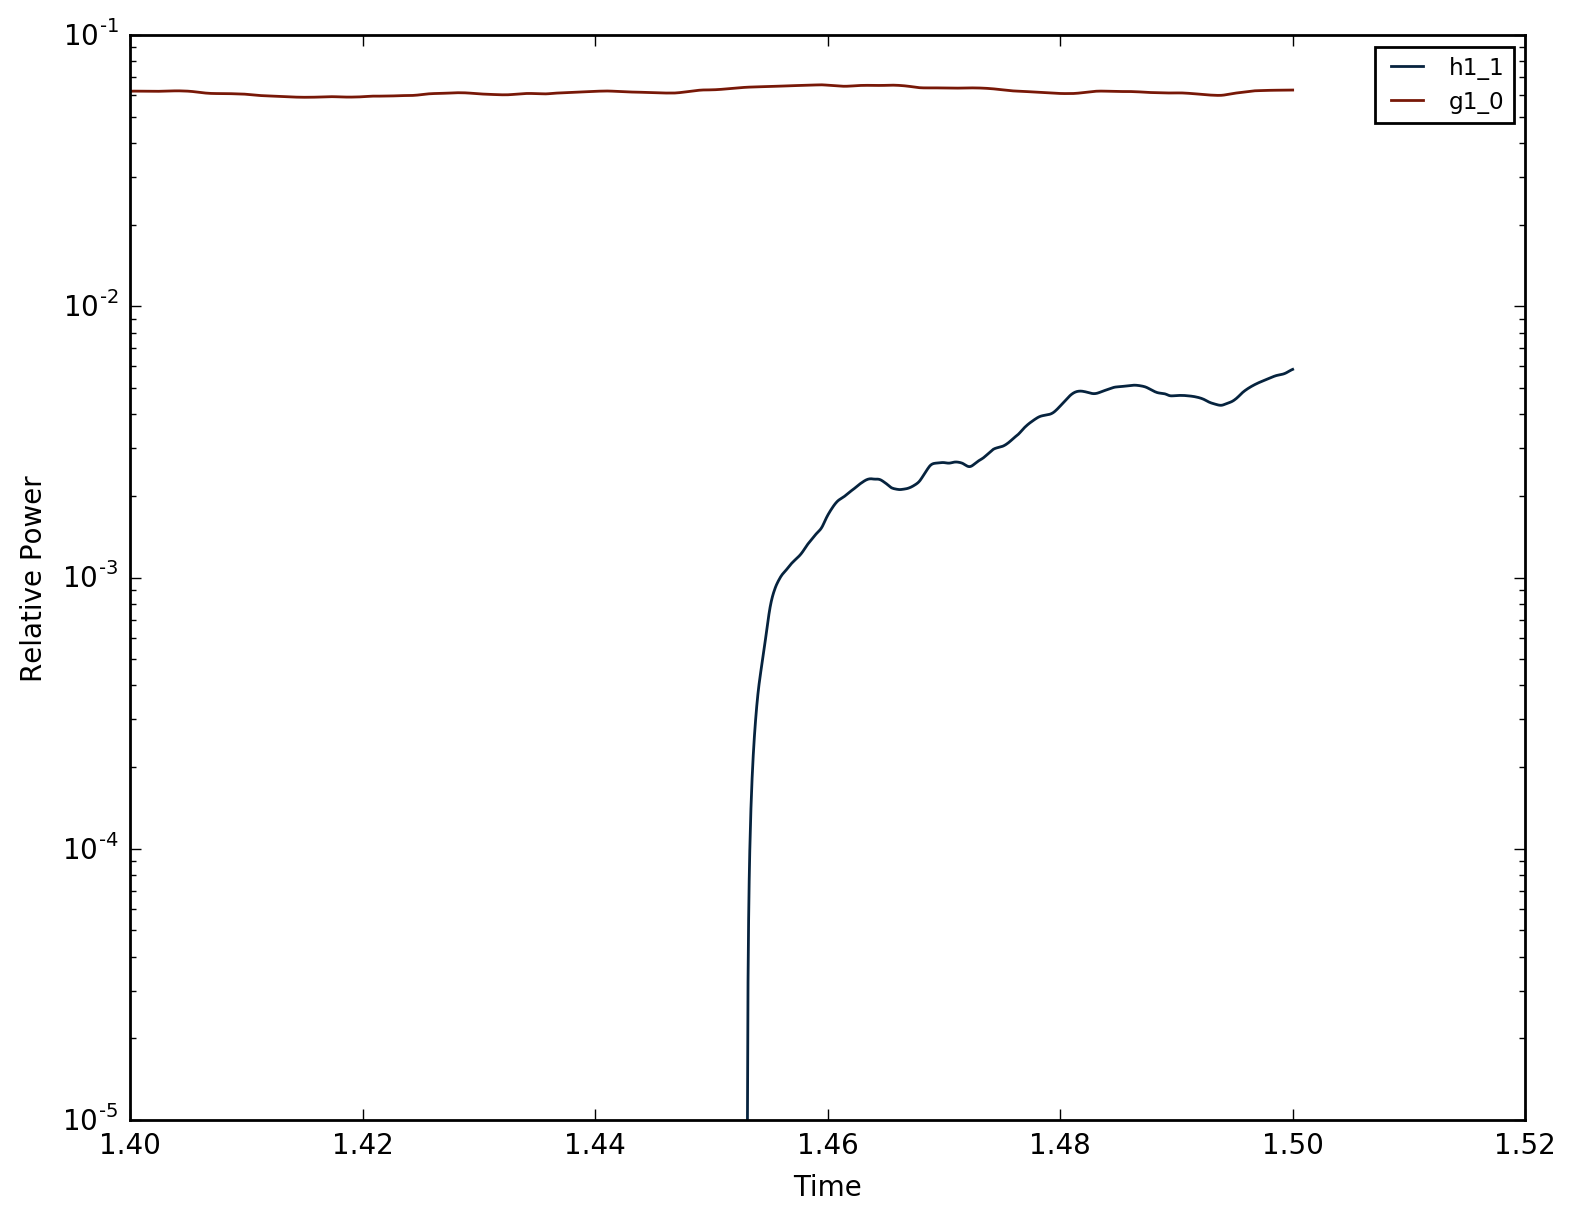

In [21]:
plt.figure(figsize=(9,7))
for column in gauss_coef.columns[2:4].tolist():
    plt.plot(gauss_coef.time.tolist(), gauss_coef[column].tolist(), c = np.random.rand(3), label=column)
plt.legend(fontsize='small')
plt.yscale('log')
# plt.xlim(gauss_coef.time.min(), gauss_coef.time.max())
plt.xlabel('Time')
plt.ylabel('Relative Power')
plt.savefig('gauss_coef_plot.pdf')
plt.show()

In [22]:
gauss_coef['h1_1'].tolist()

[-0.00027678503174479,
 -0.00028871390317083701,
 -0.00030050125893190999,
 -0.00031212687044113901,
 -0.000323647246880463,
 -0.000335168735935598,
 -0.00034680594571635603,
 -0.00035864965738911401,
 -0.000370752953358662,
 -0.00038312342950287405,
 -0.00039572103342446299,
 -0.00040847096127647403,
 -0.00042128938056892201,
 -0.00043410531046077699,
 -0.00044687329200364005,
 -0.00045958377438342696,
 -0.000472267601083403,
 -0.000484980535561613,
 -0.00049776197367536103,
 -0.00051058920945967398,
 -0.00052338155848734096,
 -0.00053607343313951999,
 -0.00054867644453937103,
 -0.00056126572762365894,
 -0.00057392968162894007,
 -0.00058674210456520503,
 -0.00059976249507491205,
 -0.00061304767490900599,
 -0.00062666458660932598,
 -0.00064068190053594295,
 -0.000655139409012405,
 -0.00067002172159148895,
 -0.00068525620166794198,
 -0.00070073947713110494,
 -0.00071638010125078398,
 -0.00073214303041226395,
 -0.00074808501451105805,
 -0.00076435024903014201,
 -0.00078111236858561107,
 

In [23]:
np.average(gauss_coef['h1_1'].tolist()[-1])/np.average(gauss_coef['g1_0'].tolist()[-1])

0.09337179969848379

In [24]:
gauss_coef

,t_step,time,h1_1,g1_0,g1_1,h2_2,h2_1,g2_0,g2_1,g2_2,h3_3,h3_2,h3_1,g3_0,g3_1,g3_2,g3_3
0,2800000.0,1.40000,-0.000277,0.062041,0.002854,-0.000597,-0.000285,-0.000589,0.000418,0.000519,1.586897e-04,-0.000447,-0.000456,0.001453,-0.000327,-0.000451,0.000423
1,2800100.0,1.40005,-0.000289,0.062056,0.002836,-0.000606,-0.000271,-0.000603,0.000418,0.000516,1.608804e-04,-0.000441,-0.000457,0.001453,-0.000326,-0.000455,0.000419
2,2800200.0,1.40010,-0.000301,0.062069,0.002818,-0.000613,-0.000257,-0.000615,0.000418,0.000513,1.626097e-04,-0.000436,-0.000458,0.001453,-0.000324,-0.000459,0.000416
3,2800300.0,1.40015,-0.000312,0.062079,0.002801,-0.000620,-0.000244,-0.000628,0.000416,0.000511,1.639494e-04,-0.000432,-0.000459,0.001453,-0.000323,-0.000463,0.000412
4,2800400.0,1.40020,-0.000324,0.062087,0.002785,-0.000626,-0.000232,-0.000639,0.000414,0.000509,1.649974e-04,-0.000429,-0.000459,0.001454,-0.000323,-0.000467,0.000408
5,2800500.0,1.40025,-0.000335,0.062093,0.002770,-0.000631,-0.000221,-0.000651,0.000411,0.000506,1.658560e-04,-0.000426,-0.000459,0.001456,-0.000322,-0.000471,0.000405
6,2800600.0,1.40030,-0.000347,0.062096,0.002756,-0.000635,-0.000211,-0.000663,0.000406,0.000504,1.666160e-04,-0.000424,-0.000458,0.001458,-0.000322,-0.000475,0.000402
7,2800700.0,1.40035,-0.000359,0.062098,0.002742,-0.000639,-0.000204,-0.000674,0.000402,0.000501,1.673611e-04,-0.000422,-0.000457,0.001462,-0.000321,-0.000478,0.000399
8,2800800.0,1.40040,-0.000371,0.062097,0.002730,-0.000643,-0.000199,-0.000685,0.000396,0.000498,1.681828e-04,-0.000421,-0.000456,0.001467,-0.000321,-0.000481,0.000396
9,2800900.0,1.40045,-0.000383,0.062095,0.002718,-0.000645,-0.000195,-0.000696,0.000390,0.000494,1.691787e-04,-0.000421,-0.000454,0.001474,-0.000320,-0.000483,0.000393


In [25]:
gauss_coef_trimmed = gauss_coef[gauss_coef.columns[1:].tolist()]
gauss_coef_trimmed.set_index('time', inplace=True)

In [26]:
by_pole = pd.DataFrame(columns=['time', 'dipole', 'quadrupole', 'octupole'])

In [27]:
for i in range(len(gauss_coef_trimmed)):
    time_index = gauss_coef_trimmed.index[i]
    by_pole.set_value(i, 'time', time_index)
    by_pole.set_value(i, 
                      'dipole', 
                      np.sqrt((gauss_coef_trimmed.h1_1[time_index])**2 + 
                              (gauss_coef_trimmed.g1_0[time_index])**2 + 
                              (gauss_coef_trimmed.g1_1[time_index])**2))
    by_pole.set_value(i, 
                      'quadrupole', 
                      np.sqrt((gauss_coef_trimmed.h2_2[time_index])**2 + 
                              (gauss_coef_trimmed.h2_1[time_index])**2 + 
                              (gauss_coef_trimmed.g2_0[time_index])**2 + 
                              (gauss_coef_trimmed.g2_1[time_index])**2 + 
                              (gauss_coef_trimmed.g2_2[time_index])**2))
    by_pole.set_value(i, 
                      'octupole', 
                      np.sqrt((gauss_coef_trimmed.h3_3[time_index])**2 + 
                              (gauss_coef_trimmed.h3_2[time_index])**2 + 
                              (gauss_coef_trimmed.h3_1[time_index])**2 + 
                              (gauss_coef_trimmed.g3_0[time_index])**2 + 
                              (gauss_coef_trimmed.g3_1[time_index])**2 + 
                              (gauss_coef_trimmed.g3_2[time_index])**2 + 
                              (gauss_coef_trimmed.g3_3[time_index])**2))

In [28]:
by_pole.set_index(['time'], inplace=True)

In [29]:
by_pole.head()

,dipole,quadrupole,octupole
time,,,
1.40000,0.0621077,0.00110895,0.00174201
1.40005,0.0621216,0.0011156,0.00174071
1.40010,0.0621334,0.00112181,0.00173972
1.40015,0.0621429,0.00112761,0.00173915
1.40020,0.0621503,0.00113306,0.00173914


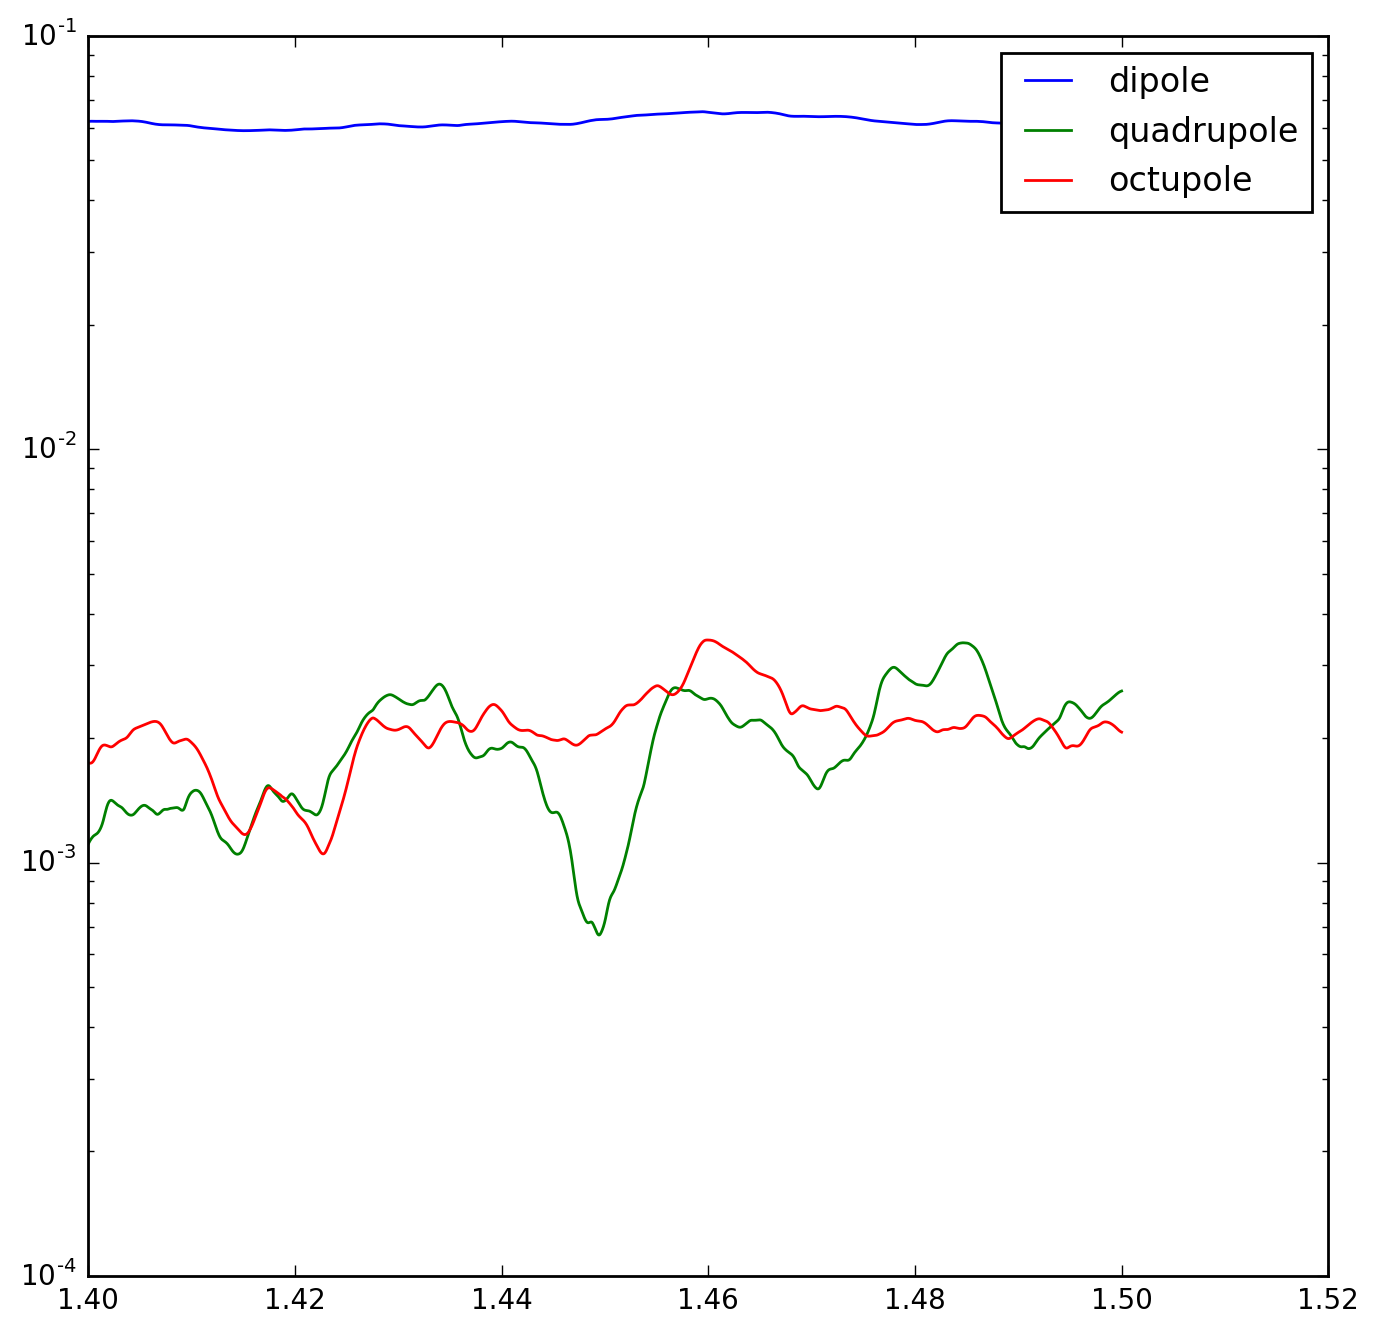

In [30]:
plt.figure(figsize=(8,8))
plt.plot(by_pole.index.tolist(), by_pole.dipole.tolist(), label='dipole')
plt.plot(by_pole.index.tolist(), by_pole.quadrupole.tolist(), label='quadrupole')
plt.plot(by_pole.index.tolist(), by_pole.octupole.tolist(), label='octupole')
plt.yscale('log')
plt.legend()
plt.show()

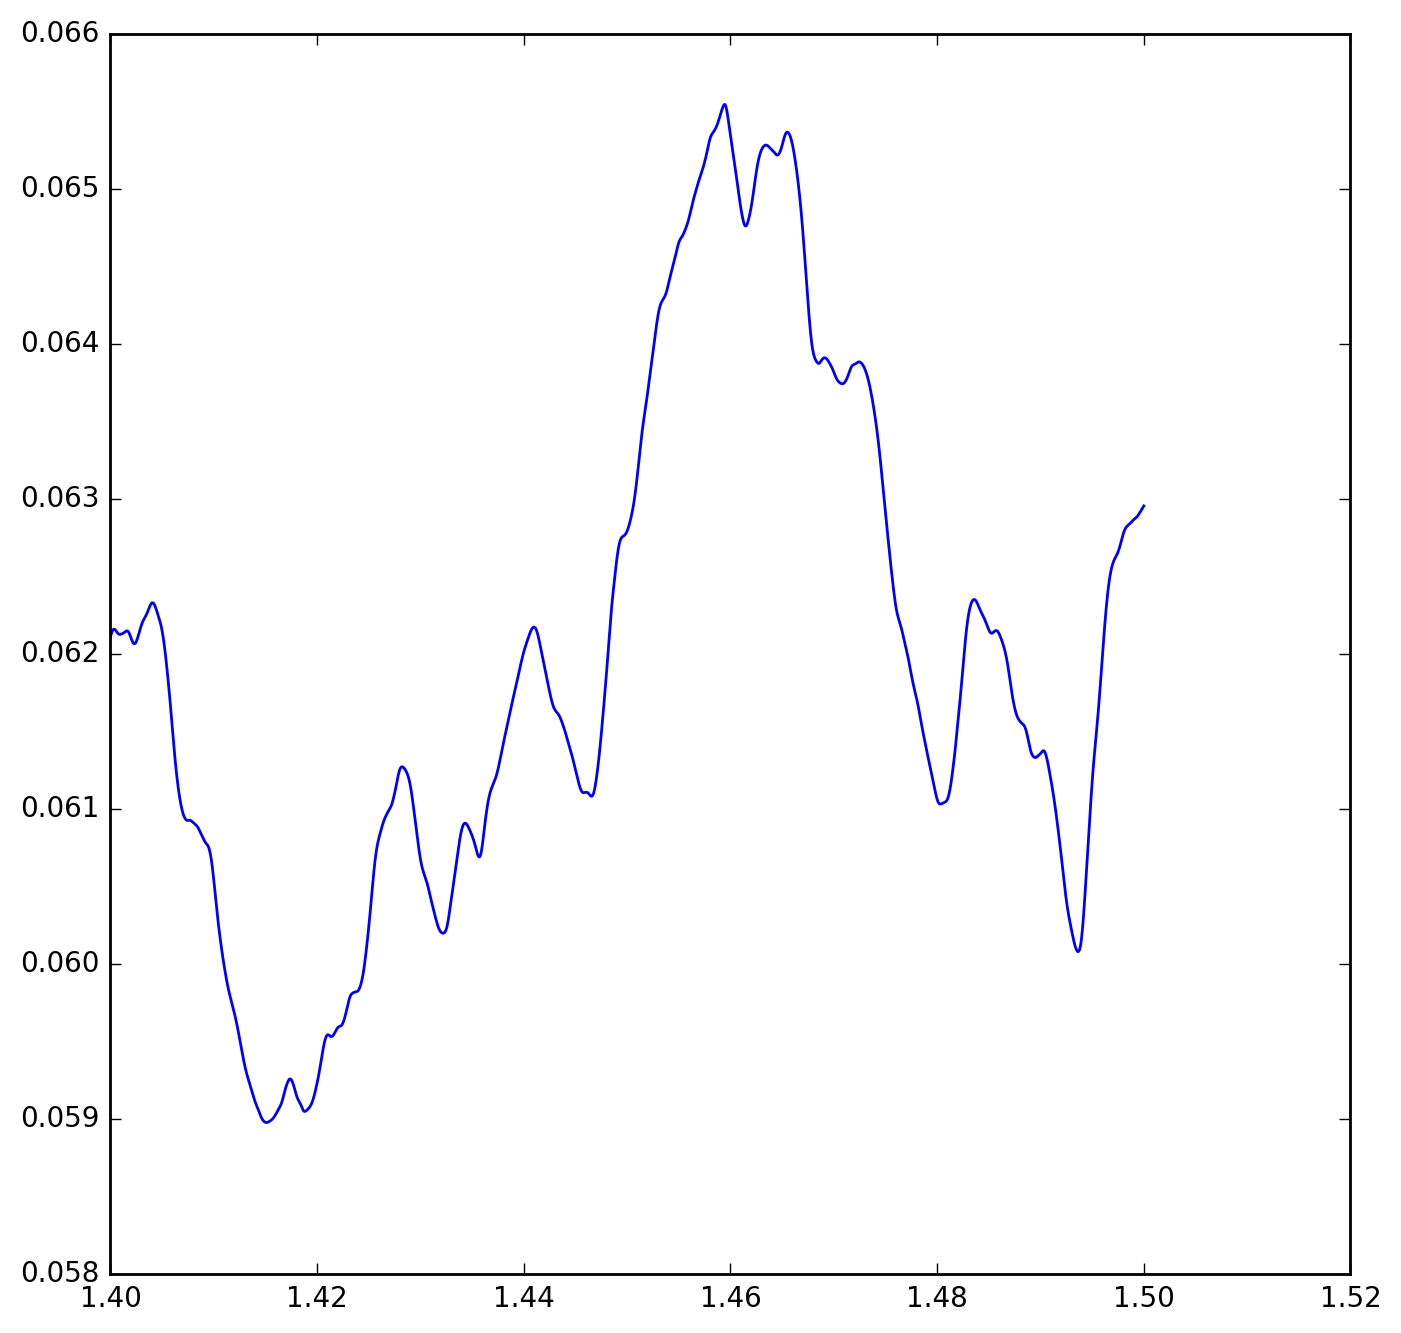

In [31]:
plt.figure(figsize=(8,8))
plt.plot(by_pole.index.tolist(), by_pole.dipole.tolist(), label='dipole')
plt.show()

In [32]:
gauss_coef.reset_index(drop=True, inplace=True)

In [33]:
t_0 = list(gauss_coef.ix[0, ['g1_0', 'g1_1', 'h1_1', 'g2_0', 'g2_1', 'h2_1', 'g2_2', 'h2_2', 'g3_0', 'g3_1', 'h3_1', 'g3_2', 'h3_2', 'g3_3', 'h3_3']])

In [34]:
# vgps = pd.DataFrame(columns=['dec', 'inc', 'site_lat', 'site_lon', 'vgp_lat', 'vgp_lon'])
# mean_poles = pd.DataFrame(columns=['site_lat', 'site_lon', 'mean_pole_lat', 'mean_pole_lon', 'mean_pole_A95', 'mean_pole_k', 'actual_pole_lat', 'actual_pole_lon'])
vgps = pd.read_csv('VGPs.csv', usecols=['dec', 'inc', 'site_lat', 'site_lon', 'vgp_lat', 'vgp_lon'])
mean_poles = pd.read_csv('mean_poles.csv', usecols=['site_lat',
                                                    'site_lon',
                                                    'mean_pole_lat',
                                                    'mean_pole_lon', 
                                                    'mean_pole_A95', 'mean_pole_k',
                                                    'actual_pole_lat',
                                                    'actual_pole_lon'])

In [35]:
def pole_figure_appearance(size = (7,7), center_lat = 35, center_lon = 200):
    m = Basemap(projection='ortho',lat_0=center_lat,lon_0=center_lon,resolution='c',
                area_thresh=50000)
    plt.figure(figsize=size)
    m.drawcoastlines(linewidth=0.25)
    m.fillcontinents(color='bisque',lake_color='white',zorder=1)
    m.drawmapboundary(fill_color='white')
    m.drawmeridians(np.arange(0,360,30))
    m.drawparallels(np.arange(-90,90,30))
    return m

In [36]:
mode, data = pmag.get_igrf12()

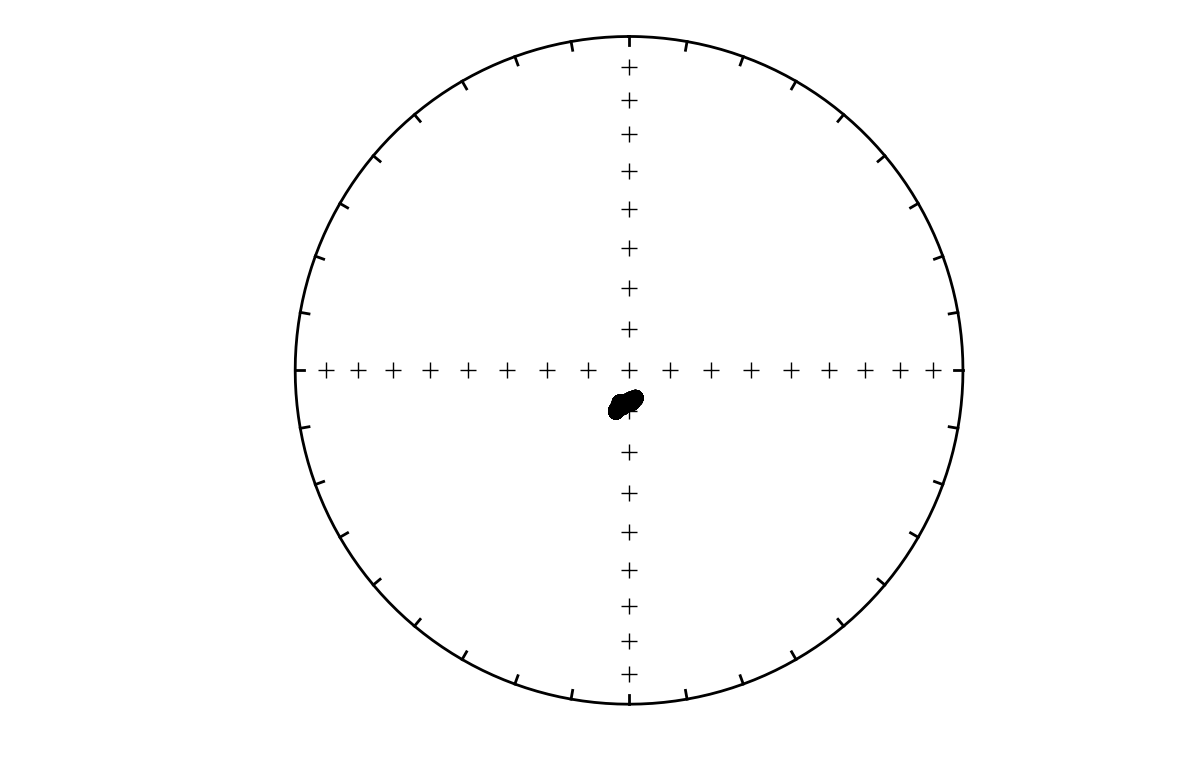

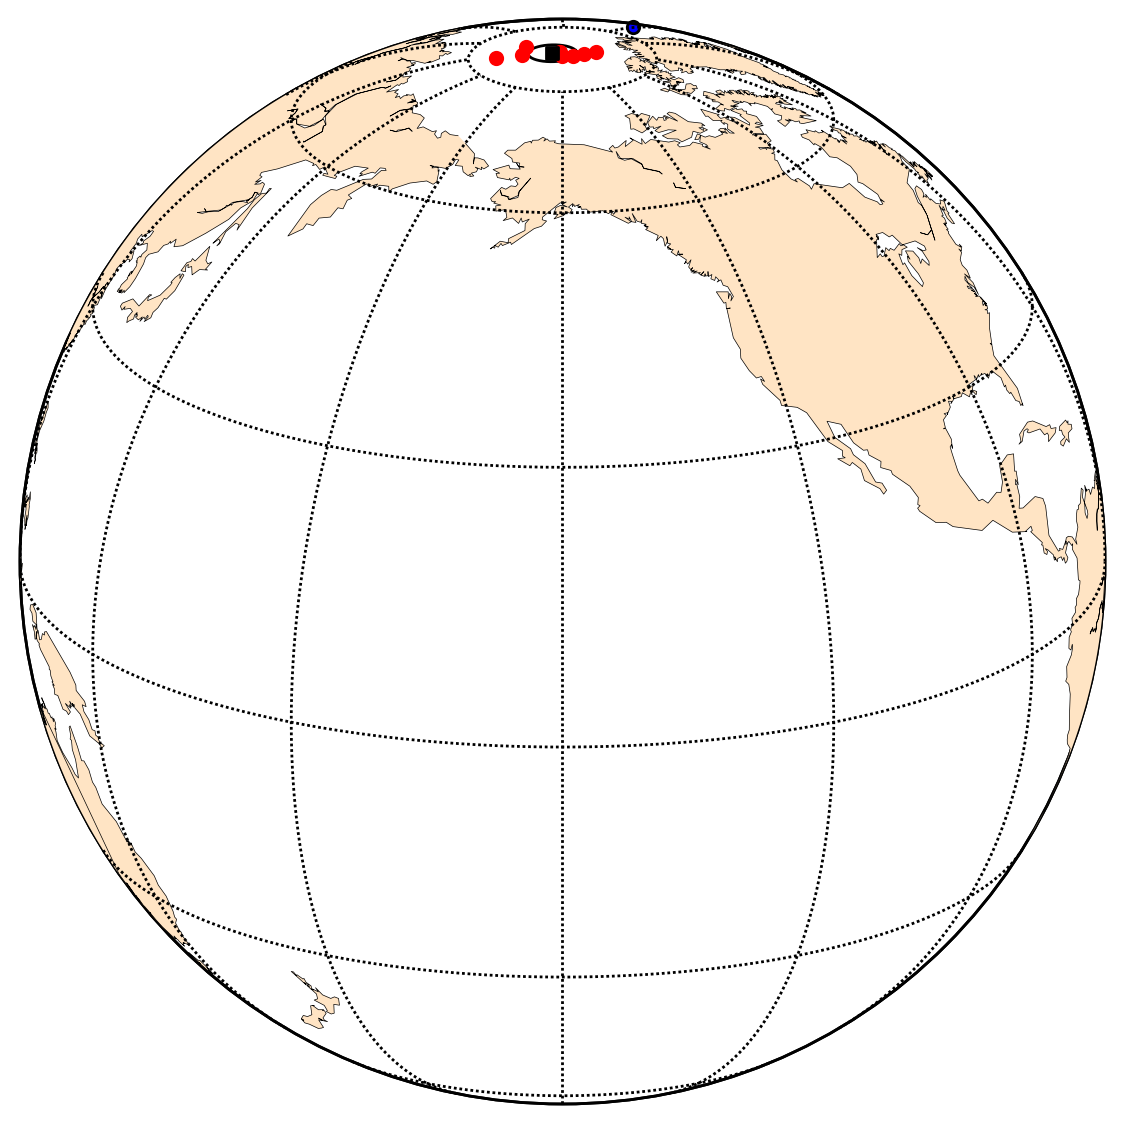

In [40]:
# for lon in range(0, 380, 30):
# for lat in range(-90, 100, 30):
lat = 75
lon = 0

plt.figure(1)
ipmag.plot_net(1)
dec_list = []
inc_list = []
lat_list = []
lon_list = []
for i in range(len(gauss_coef)):
    g_coefs = list(gauss_coef.ix[i, ['g1_0', 'g1_1', 'h1_1', 'g2_0', 'g2_1', 'h2_1', 'g2_2', 'h2_2', 'g3_0', 'g3_1', 'h3_1', 'g3_2', 'h3_2', 'g3_3', 'h3_3']])
    block = list(pmag.getvec(g_coefs,lat, lon))
    ipmag.plot_di(block[0], block[1])
    dec_list.append(block[0])
    inc_list.append(block[1])
    lat_list.append(lat)
    lon_list.append(lon)
plt.show()

dirs_df = pd.DataFrame(data={'dec':dec_list, 'inc':inc_list, 'lat':lat_list, 'lon':lon_list},columns=['dec', 'inc', 'lat', 'lon'])
ipmag.vgp_calc(dirs_df, site_lat='lat', site_lon='lon', dec_tc='dec', inc_tc='inc')
#simulate 8 samples from distribution
sampled_dirs_dec = []
sampled_dirs_inc = []
sampled_dirs_lon = []
sampled_dirs_lat = []
for j in range(8):
    if j==0:
        rand_index = np.random.randint(0, len(gauss_coef)//8)
    else:
        rand_index = np.random.randint(j*len(gauss_coef)//8, (j+1)*len(gauss_coef)//8)
    sampled_dirs_dec.append(dirs_df['dec'].tolist()[rand_index])
    sampled_dirs_inc.append(dirs_df['inc'].tolist()[rand_index])
    sampled_dirs_lon.append(dirs_df['vgp_lon_rev'].tolist()[rand_index])
    sampled_dirs_lat.append(dirs_df['vgp_lat_rev'].tolist()[rand_index])

m = pole_figure_appearance(center_lat=20, center_lon=-150)

actual_pole = ipmag.fisher_mean(dirs_df['vgp_lon_rev'].tolist(), dirs_df['vgp_lat_rev'].tolist())

mean_pole = ipmag.fisher_mean(sampled_dirs_lon, sampled_dirs_lat)
# ipmag.plot_vgp(m,dirs_df['vgp_lon_rev'].tolist(),dirs_df['vgp_lat_rev'].tolist())
ipmag.plot_vgp(m,sampled_dirs_lon, sampled_dirs_lat, color='r')
ipmag.plot_pole(m, mean_pole['dec'], mean_pole['inc'], mean_pole['alpha95'], marker='s')
m.scatter(lon, lat, latlon=True)
plt.savefig('source_VGPS.svg')
plt.show()

vgps = vgps.append(pd.Series(data = {'dec':sampled_dirs_dec, 'inc':sampled_dirs_inc, 
                              'site_lat':lat, 'site_lon':lon, 
                              'vgp_lat':sampled_dirs_lat, 'vgp_lon':sampled_dirs_lon}), ignore_index=True)
mean_poles = mean_poles.append(pd.Series(data = {'site_lat':lat, 'site_lon':lon, 
                             'mean_pole_lat':mean_pole['inc'], 
                             'mean_pole_lon':mean_pole['dec'], 
                             'mean_pole_A95':mean_pole['alpha95'],
                             'mean_pole_k':mean_pole['k'],
                             'actual_pole_lat':actual_pole['inc'], 
                             'actual_pole_lon':actual_pole['dec']}), ignore_index=True)
mean_poles.to_csv('mean_poles.csv')
vgps.to_csv('VGPs.csv')

In [38]:
mean_pole

{'alpha95': 3.1233037358511422,
 'csd': 4.5601416260009326,
 'dec': 113.24297398881708,
 'inc': 89.711690881407335,
 'k': 315.51017964821608,
 'n': 8,
 'r': 7.9778137110891167}

In [21]:
mean_poles

,site_lat,site_lon,mean_pole_lat,mean_pole_lon,mean_pole_A95,actual_pole_lat,actual_pole_lon,mean_pole_k
0,90.0,180.0,88.513487,196.505327,1.732889,88.335327,192.526064,NaN
1,90.0,180.0,88.628490,183.222663,2.185026,88.335327,192.526064,NaN
2,-90.0,180.0,87.311757,142.864856,1.662081,88.069444,138.446912,NaN
3,-60.0,180.0,87.016921,141.423857,1.920043,87.469063,149.814195,NaN
4,-30.0,180.0,87.818098,172.076865,2.540111,87.997381,156.207445,NaN
5,0.0,180.0,88.892272,120.464735,2.404197,89.264108,163.761151,NaN
6,30.0,180.0,89.101397,303.591831,3.188090,89.405384,329.364360,NaN
7,60.0,180.0,88.288320,0.013300,2.576409,88.556606,340.775471,NaN
8,90.0,180.0,88.311020,160.388778,1.924371,88.335327,192.526064,NaN
9,-45.0,180.0,87.660807,153.611862,1.935540,87.504921,154.419651,NaN


In [22]:
total_pole_quant = by_pole.dipole.mean() + by_pole.quadrupole.mean() + by_pole.octupole.mean()
G2_frac = by_pole.quadrupole.mean()/total_pole_quant
G3_frac = by_pole.octupole.mean()/total_pole_quant

In [23]:
print G2_frac
print G3_frac

0.0293034563766
0.0321257841848


In [24]:
nothing

NameError: name 'nothing' is not defined

In [ ]:
tk03_lat0 = ipmag.tk03(8, G2=G2_frac, G3=G3_frac)

In [ ]:
tk03_vgps = pd.DataFrame(columns=['dec', 'inc', 'site_lat', 'site_lon'])
tk03_vgps.dec = ipmag.unpack_di_block(tk03_lat0)[0]
tk03_vgps.inc = ipmag.unpack_di_block(tk03_lat0)[1]
tk03_vgps.site_lat = [0.]*8
tk03_vgps.site_lon = [0.]*8

In [ ]:
ipmag.vgp_calc(tk03_vgps, dec_tc='dec', inc_tc='inc')

In [ ]:
m = pole_figure_appearance(center_lat=20, center_lon=-150)
mean_pole = ipmag.fisher_mean(tk03_vgps.vgp_lon.tolist(), tk03_vgps.vgp_lat.tolist())
ipmag.plot_vgp(m,tk03_vgps.vgp_lon.tolist(),  tk03_vgps.vgp_lat.tolist(), color='r')
ipmag.plot_pole(m, mean_pole['dec'], mean_pole['inc'], mean_pole['alpha95'], marker='s')
# m.scatter(lon, lat, latlon=True)
plt.show()

In [ ]:
plt.figure(1)
ipmag.plot_net(1)
dec_list = []
inc_list = []
lat_list = []
lon_list = []
lon=0
for lat in range(-90, 100, 10):
    for i in range(len(gauss_coef)):
        time_step = list(gauss_coef.ix[i, ['g1_0', 'g1_1', 'h1_1', 'g2_0', 'g2_1', 'h2_1', 'g2_2', 'h2_2', 'g3_0', 'g3_1', 'h3_1', 'g3_2', 'h3_2', 'g3_3', 'h3_3']]*1000)
        block = list(pmag.getvec(time_step,lat, lon))
        ipmag.plot_di(block[0], block[1])
        dec_list.append(block[0])
        inc_list.append(block[1])
        lat_list.append(lat)
        lon_list.append(lon)
plt.show()

In [ ]:
mean_poles.to_csv('mean_poles.csv')
vgps.to_csv('VGPs.csv')

In [ ]:
dirs_df = pd.DataFrame(data={'dec':dec_list, 'inc':inc_list, 'lat':lat_list, 'lon':lon_list} ,columns=['dec', 'inc', 'lat', 'lon'])

In [ ]:
ipmag.vgp_calc(dirs_df, site_lat='lat', site_lon='lon', dec_tc='dec', inc_tc='inc')

In [ ]:
#simulate 8 samples from distribution
sampled_dirs_lon = []
sampled_dirs_lat = []
for j in range(8):
    rand_index = np.random.randint(0, len(gauss_coef))
    sampled_dirs_lon.append(dirs_df['vgp_lon_rev'].tolist()[rand_index])
    sampled_dirs_lat.append(dirs_df['vgp_lat_rev'].tolist()[rand_index])

In [ ]:
m = pole_figure_appearance(center_lat=20, center_lon=-150)

mean_pole = ipmag.fisher_mean(sampled_dirs_lon, sampled_dirs_lat)
# ipmag.plot_vgp(m,dirs_df['vgp_lon_rev'].tolist(),dirs_df['vgp_lat_rev'].tolist())
ipmag.plot_vgp(m,sampled_dirs_lon, sampled_dirs_lat, color='r')
ipmag.plot_pole(m, mean_pole['dec'], mean_pole['inc'], mean_pole['alpha95'], marker='s')
m.scatter(lon, lat, latlon=True)
plt.show()

In [ ]:
m = pole_figure_appearance(center_lat=20, center_lon=-150)

mean_pole = ipmag.fisher_mean(sampled_dirs_lon, sampled_dirs_lat)
# ipmag.plot_vgp(m,dirs_df['vgp_lon_rev'].tolist(),dirs_df['vgp_lat_rev'].tolist())
ipmag.plot_vgp(m,sampled_dirs_lon, sampled_dirs_lat, color='r')
ipmag.plot_pole(m, mean_pole['dec'], mean_pole['inc'], mean_pole['alpha95'], marker='s')
m.scatter(lon, lat, latlon=True)
plt.show()